In [33]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

In [ ]:
diabetes_data.info(verbose=True)

In [ ]:
diabetes_data.describe()

In [ ]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

In [7]:
#Aiming to impute nan values for the columns in accordance with their distribution
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [ ]:
#Plotting after Nan removal
p = diabetes_data_copy.hist(figsize = (20,20))

In [ ]:
## observing the shape of the data
diabetes_data.shape

In [ ]:
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

In [ ]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


In [ ]:
#The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

In [ ]:
# Scatter matrix of uncleaned data
from pandas.plotting import scatter_matrix

p = scatter_matrix(diabetes_data, figsize=(25, 25))


In [ ]:
#### Pair plot for clean data
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Set the size of the figure
p = sns.heatmap(diabetes_data.corr(), annot=True, cmap='RdYlGn')  # Seaborn heatmap


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Set the size of the figure
p = sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap='RdYlGn')  # Seaborn heatmap


In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

In [24]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

In [25]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [27]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

RESULT VISULISATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('Train and Test Scores vs. Number of Neighbors')
plt.legend()
plt.show()


The best result is captured at k = 11 hence 11 is used for the final model

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

Model Performance Analysis

Accuracy of SVM Model: 0.734375
Accuracy of Decision Tree Model: 0.7109375
Accuracy of Logistic Regression Model: 0.73046875

Classification Report for SVM Model:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       167
           1       0.65      0.51      0.57        89

    accuracy                           0.73       256
   macro avg       0.71      0.68      0.69       256
weighted avg       0.73      0.73      0.73       256


Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       167
           1       0.59      0.57      0.58        89

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256


Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.77

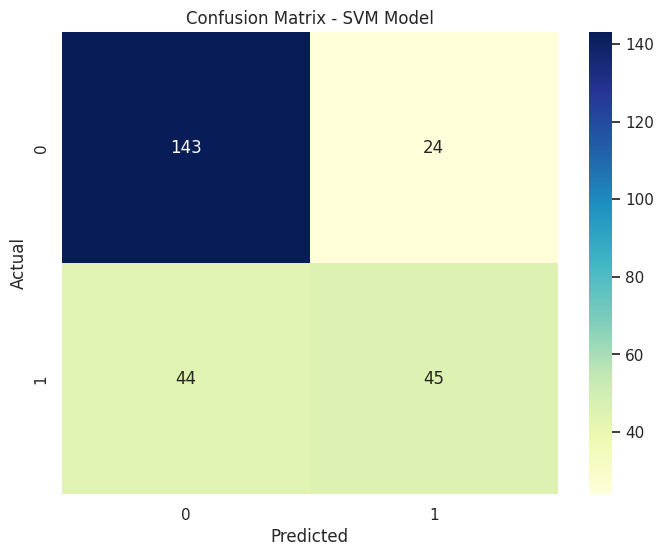

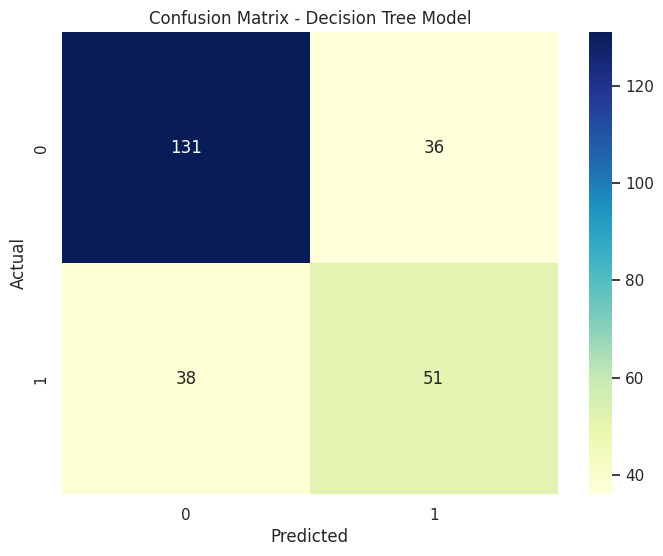

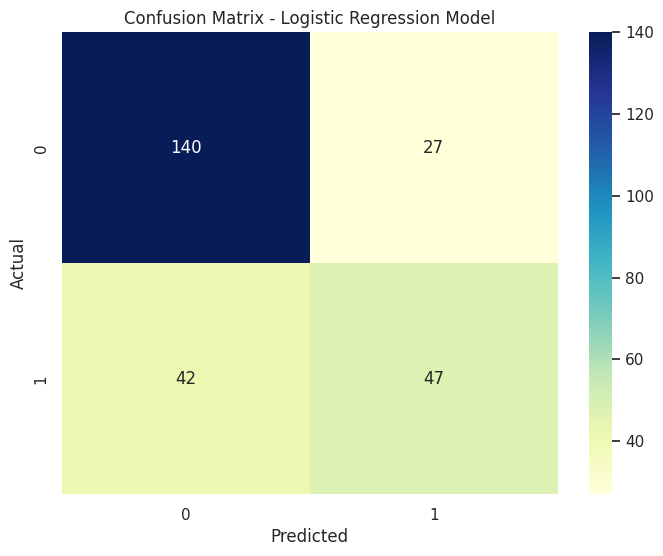

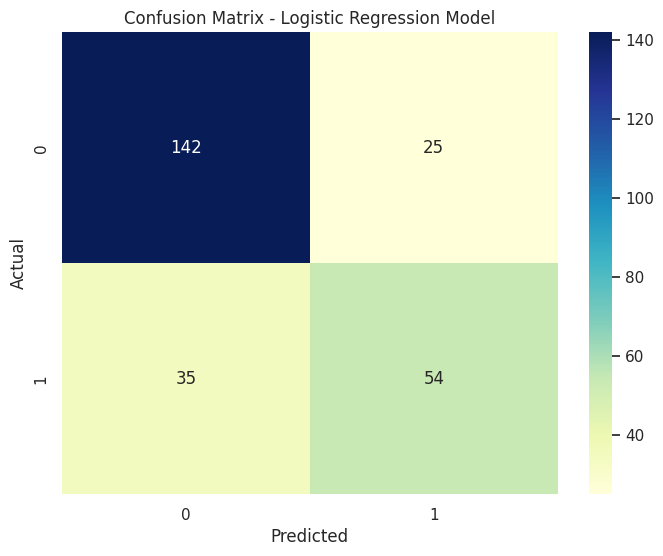

In [34]:
# Import necessary libraries for new algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Train Logistic Regression model
lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)

# Compare accuracies of all models

print("Accuracy of SVM Model:", svm_accuracy)
print("Accuracy of Decision Tree Model:", dt_accuracy)
print("Accuracy of Logistic Regression Model:", lr_accuracy)

# Classification Reports for all models

print("\nClassification Report for SVM Model:\n", classification_report(y_test, svm_y_pred))
print("\nClassification Report for Decision Tree Model:\n", classification_report(y_test, dt_y_pred))
print("\nClassification Report for Logistic Regression Model:\n", classification_report(y_test, lr_y_pred))
print("\nClassification Report for KNN Model:\n" , classification_report(y_test,knn_y_pred))

# Confusion Matrix for all models

print("\nConfusion Matrix for SVM Model:\n", confusion_matrix(y_test, svm_y_pred))
print("\nConfusion Matrix for Decision Tree Model:\n", confusion_matrix(y_test, dt_y_pred))
print("\nConfusion Matrix for Logistic Regression Model:\n", confusion_matrix(y_test, lr_y_pred))

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for SVM model
plot_confusion_matrix(y_test, svm_y_pred, title='Confusion Matrix - SVM Model')

# Plot confusion matrix for Decision Tree model
plot_confusion_matrix(y_test, dt_y_pred, title='Confusion Matrix - Decision Tree Model')

# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test, lr_y_pred, title='Confusion Matrix - Logistic Regression Model')

# Plot confusion matrix for KNN model
plot_confusion_matrix(y_test,knn_y_pred, title='Confusion Matrix - Logistic Regression Model')